In [1]:
#| hide
# what


# Single-Cell-Fuzzy-Labels


![Single-Cell Fuzzy Labels Concept](https://raw.githubusercontent.com/Eamonmca/Single-Cell-Fuzzy-Labels/master/Single_Cell_Fuzzy_Labels/logo.png)


## Install

 ```sh
git clone https://github.com/Eamonmca/Single-Cell-Fuzzy-Labels
cd Single-Cell-Fuzzy-Labels
pip install .
 ```


## How to use

Download pre-embedded data from the cellxgene census or embed your own data following the insturction of your foundation model of choice - the embeddings used in this tutorial are from the 33 layer Universal Cell Embeddings model which we can download for any subset of cells from the 33 million contained within the cellxgene census.

In [2]:
from Single_Cell_Fuzzy_Labels import census
import scanpy as sc 


In [3]:
# reference = census.download_emb(organism='homo_sapiens', tissue='lung', test = True)
reference = sc.read_h5ad('/data/analysis/data_mcandrew/000-sc-UCA-test/uce/HCA_lung_core__uce_adata.h5ad')

In [4]:
reference

AnnData object with n_obs × n_vars = 584944 × 18166
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

In [5]:

reference_subset = reference[reference.obs['ann_level_1'] == 'Epithelial']


In [6]:
reference = reference_subset

In [7]:
reference.obsm['X_uce']

ArrayView([[ 0.00750788, -0.04194154,  0.00931572, ...,  0.03899895,
            -0.02080086, -0.01758753],
           [ 0.02603231,  0.03415936, -0.00083805, ...,  0.01040316,
             0.00231683,  0.07622543],
           [ 0.01907516, -0.03912187,  0.01917193, ...,  0.02607882,
             0.02887304, -0.00058624],
           ...,
           [ 0.00766119, -0.03144012,  0.00277021, ...,  0.03181685,
             0.00958184,  0.01409992],
           [-0.0129706 ,  0.04543586, -0.00394633, ..., -0.01092251,
             0.01244534,  0.01408385],
           [-0.0060271 ,  0.00604395,  0.01479142, ..., -0.00512656,
            -0.01186521,  0.02647699]], dtype=float32)

lets import our query dataset for which we have precomputed the embedding using the instuction on the UCE github page 

Next lets use our well annotated refernece dataset to predict the labels in our query dataset.

In [8]:
query = sc.read_h5ad('/data/analysis/data_mcandrew/000-sc-UCA-test/uce/HBECS_ALI28_uce_adata.h5ad')

In [9]:
query

AnnData object with n_obs × n_vars = 10224 × 14949
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'percent.mito', 'percent.ribo', 'dropouts', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.4', 'seurat_clusters', 'echantillon', 'donor', 'medium', 'sample', 'type', 'batch', 'type_pred', 'type_uncertainty', 'leiden', 'RNA_snn_res.1', 'cluster_l1', 'celltype_l1', 'ident', 'n_genes'
    var: 'n_cells'
    uns: 'X_name'
    obsm: 'SCANVI', 'UMAP', 'X_uce'
    layers: 'logcounts'

In [10]:
query.obsm['X_uce']

array([[ 0.0045417 , -0.0086563 ,  0.01687446, ...,  0.02272223,
        -0.01826951, -0.01024585],
       [ 0.01364084, -0.00542254,  0.01779299, ...,  0.01887637,
        -0.00538362,  0.00553044],
       [ 0.00350829,  0.01183089,  0.01040006, ...,  0.01037928,
        -0.01872197, -0.01138068],
       ...,
       [-0.00063122, -0.01984753,  0.02148496, ...,  0.00014579,
         0.01573275, -0.00872346],
       [ 0.00331486, -0.00467246, -0.02007541, ...,  0.01982483,
         0.00755446,  0.00302285],
       [-0.00757075,  0.01373623,  0.01243316, ...,  0.03014414,
        -0.01670015, -0.01620588]], dtype=float32)

In [11]:
from Single_Cell_Fuzzy_Labels import transfer 

In [12]:
predicted_labels = transfer.labels(embedding_array_reference=reference.obsm['X_uce'], 
                          embedding_array_query=query.obsm['X_uce'], 
                          reference_labels=reference.obs['ann_finest_level'], 
                          k=1, 
                          use_gpu=True, 
                          batch_size=None, 
                          distance_metric='L2', 
                          label_consensus='centroid_based', 
                          timed=False)

In [13]:
query.obs['predicted_labels'] = predicted_labels

In [14]:
query.obs['celltype_l1']

Donor1_ALI28_AAACCTGAGCCACCTG       Suprabasal
Donor1_ALI28_AAACCTGAGCTCAACT            Basal
Donor1_ALI28_AAACCTGAGTAAGTAC            Basal
Donor1_ALI28_AAACCTGCAAACCCAT            Basal
Donor1_ALI28_AAACCTGGTCCTAGCG        Secretory
                                     ...      
Donor2_ALI28_TTTGTCAGTCATATGC        Secretory
Donor2_ALI28_TTTGTCAGTCGGGTCT           Goblet
Donor2_ALI28_TTTGTCAGTTTGTTTC    Cycling Basal
Donor2_ALI28_TTTGTCATCGTACCGG        Secretory
Donor2_ALI28_TTTGTCATCTGGCGTG       Suprabasal
Name: celltype_l1, Length: 10224, dtype: category
Categories (9, object): ['Basal', 'Cycling Basal', 'Deuterosomal', 'Multiciliated', ..., 'Squamous', 'Secretory', 'Goblet', 'Rare cells']

In [15]:
predicted_labels

['Basal resting',
 'Basal resting',
 'Club (nasal)',
 'Basal resting',
 'Club (non-nasal)',
 'Goblet (nasal)',
 'Club (nasal)',
 'Suprabasal',
 'Basal resting',
 'Club (nasal)',
 'Basal resting',
 'Basal resting',
 'Basal resting',
 'Goblet (nasal)',
 'Suprabasal',
 'Basal resting',
 'Club (nasal)',
 'Club (non-nasal)',
 'Basal resting',
 'Club (nasal)',
 'Deuterosomal',
 'Basal resting',
 'Basal resting',
 'Club (non-nasal)',
 'Club (nasal)',
 'Goblet (nasal)',
 'Club (non-nasal)',
 'Basal resting',
 'Club (nasal)',
 'Basal resting',
 'Club (non-nasal)',
 'Basal resting',
 'Goblet (nasal)',
 'Suprabasal',
 'Club (nasal)',
 'Club (non-nasal)',
 'Basal resting',
 'Basal resting',
 'Club (nasal)',
 'Club (nasal)',
 'Goblet (nasal)',
 'Club (nasal)',
 'Suprabasal',
 'Club (non-nasal)',
 'Basal resting',
 'Club (nasal)',
 'Deuterosomal',
 'Basal resting',
 'Multiciliated (non-nasal)',
 'Club (non-nasal)',
 'Club (nasal)',
 'Multiciliated (non-nasal)',
 'Club (nasal)',
 'Basal resting',
 'S

In [16]:
from Single_Cell_Fuzzy_Labels import viz 

In [17]:
transfers = viz.map_label_transfers(query, 'predicted_labels', 'celltype_l1')

/home/mcandrew/.conda/envs/fuzz/lib/python3.9/site-packages/Single_Cell_Fuzzy_Labels/viz.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = query_dataset.obs.groupby([reference_label, predicted_query_label])[reference_label].count().unstack().fillna(0).astype(int)


In [18]:
print(transfers)

celltype_l1                   Basal  Cycling Basal  Deuterosomal  \
predicted_labels                                                   
Basal resting              0.823691       0.125148      0.000000   
Club (nasal)               0.100762       0.021675      0.002343   
Club (non-nasal)           0.003484       0.000581      0.002904   
Deuterosomal               0.037838       0.000000      0.621622   
Goblet (bronchial)         0.000000       0.000000      0.000000   
Goblet (nasal)             0.011701       0.000900      0.009901   
Goblet (subsegmental)      0.000000       0.000000      0.000000   
Hillock-like               0.555556       0.157233      0.000000   
Ionocyte                   0.200000       0.000000      0.000000   
Multiciliated (nasal)      0.000000       0.000000      0.000000   
Multiciliated (non-nasal)  0.012500       0.000000      0.011538   
SMG duct                   0.000000       0.000000      0.000000   
SMG mucous                 0.000000       0.0000

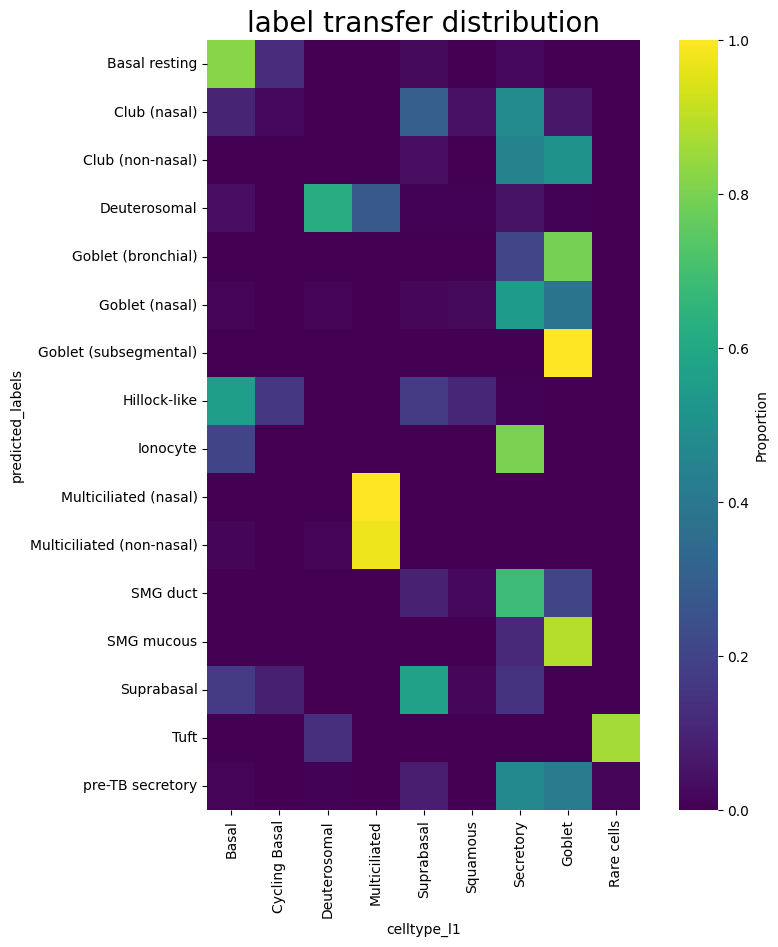

<Axes: title={'center': 'label transfer distribution'}, xlabel='celltype_l1', ylabel='predicted_labels'>

In [19]:
viz.visualize_label_distribution(transfers, fuzz1_score=None, title='label transfer distribution')

In [20]:
from Single_Cell_Fuzzy_Labels import harmonise 
from dotenv import load_dotenv
load_dotenv()


True

In [21]:
Label_alias_dict = harmonise.match_cell_labels(list(query.obs['celltype_l1'].values.unique()), list(query.obs['predicted_labels'].unique()))

In [22]:
query.obs['celltype_l1'].unique()

['Suprabasal', 'Basal', 'Secretory', 'Goblet', 'Deuterosomal', 'Multiciliated', 'Cycling Basal', 'Squamous', 'Rare cells']
Categories (9, object): ['Basal', 'Cycling Basal', 'Deuterosomal', 'Multiciliated', ..., 'Squamous', 'Secretory', 'Goblet', 'Rare cells']

In [23]:
list(query.obs['predicted_labels'].values)

['Basal resting',
 'Basal resting',
 'Club (nasal)',
 'Basal resting',
 'Club (non-nasal)',
 'Goblet (nasal)',
 'Club (nasal)',
 'Suprabasal',
 'Basal resting',
 'Club (nasal)',
 'Basal resting',
 'Basal resting',
 'Basal resting',
 'Goblet (nasal)',
 'Suprabasal',
 'Basal resting',
 'Club (nasal)',
 'Club (non-nasal)',
 'Basal resting',
 'Club (nasal)',
 'Deuterosomal',
 'Basal resting',
 'Basal resting',
 'Club (non-nasal)',
 'Club (nasal)',
 'Goblet (nasal)',
 'Club (non-nasal)',
 'Basal resting',
 'Club (nasal)',
 'Basal resting',
 'Club (non-nasal)',
 'Basal resting',
 'Goblet (nasal)',
 'Suprabasal',
 'Club (nasal)',
 'Club (non-nasal)',
 'Basal resting',
 'Basal resting',
 'Club (nasal)',
 'Club (nasal)',
 'Goblet (nasal)',
 'Club (nasal)',
 'Suprabasal',
 'Club (non-nasal)',
 'Basal resting',
 'Club (nasal)',
 'Deuterosomal',
 'Basal resting',
 'Multiciliated (non-nasal)',
 'Club (non-nasal)',
 'Club (nasal)',
 'Multiciliated (non-nasal)',
 'Club (nasal)',
 'Basal resting',
 'S

In [24]:
Label_alias_dict

{'Basal resting': 'Basal',
 'Club (nasal)': 'Secretory',
 'Club (non-nasal)': 'Secretory',
 'Goblet (nasal)': 'Goblet',
 'Suprabasal': 'Suprabasal',
 'Deuterosomal': 'Deuterosomal',
 'Multiciliated (non-nasal)': 'Multiciliated',
 'Hillock-like': 'Basal',
 'pre-TB secretory': 'Secretory',
 'SMG mucous': 'Goblet',
 'Tuft': 'Rare cells',
 'Goblet (subsegmental)': 'Goblet',
 'SMG duct': 'Secretory',
 'Ionocyte': 'Rare cells',
 'Multiciliated (nasal)': 'Multiciliated',
 'Goblet (bronchial)': 'Goblet'}

In [25]:
harmonise.map_old_labels_to_new(list(query.obs['predicted_labels'].values), Label_alias_dict)

['Basal',
 'Basal',
 'Secretory',
 'Basal',
 'Secretory',
 'Goblet',
 'Secretory',
 'Suprabasal',
 'Basal',
 'Secretory',
 'Basal',
 'Basal',
 'Basal',
 'Goblet',
 'Suprabasal',
 'Basal',
 'Secretory',
 'Secretory',
 'Basal',
 'Secretory',
 'Deuterosomal',
 'Basal',
 'Basal',
 'Secretory',
 'Secretory',
 'Goblet',
 'Secretory',
 'Basal',
 'Secretory',
 'Basal',
 'Secretory',
 'Basal',
 'Goblet',
 'Suprabasal',
 'Secretory',
 'Secretory',
 'Basal',
 'Basal',
 'Secretory',
 'Secretory',
 'Goblet',
 'Secretory',
 'Suprabasal',
 'Secretory',
 'Basal',
 'Secretory',
 'Deuterosomal',
 'Basal',
 'Multiciliated',
 'Secretory',
 'Secretory',
 'Multiciliated',
 'Secretory',
 'Basal',
 'Suprabasal',
 'Secretory',
 'Secretory',
 'Goblet',
 'Basal',
 'Secretory',
 'Multiciliated',
 'Secretory',
 'Secretory',
 'Suprabasal',
 'Secretory',
 'Secretory',
 'Secretory',
 'Secretory',
 'Secretory',
 'Basal',
 'Secretory',
 'Secretory',
 'Secretory',
 'Basal',
 'Secretory',
 'Secretory',
 'Secretory',
 'Mu

In [26]:
query.obs['mapped_predictions'] = harmonise.map_old_labels_to_new(list(query.obs['predicted_labels'].values), Label_alias_dict)

/home/mcandrew/.conda/envs/fuzz/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mcandrew/.conda/envs/fuzz/lib/python3.9/site-packages/Single_Cell_Fuzzy_Labels/viz.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = query_dataset.obs.groupby([reference_label, predicted_query_label])[reference_label].count().unstack().fillna(0).astype(int)


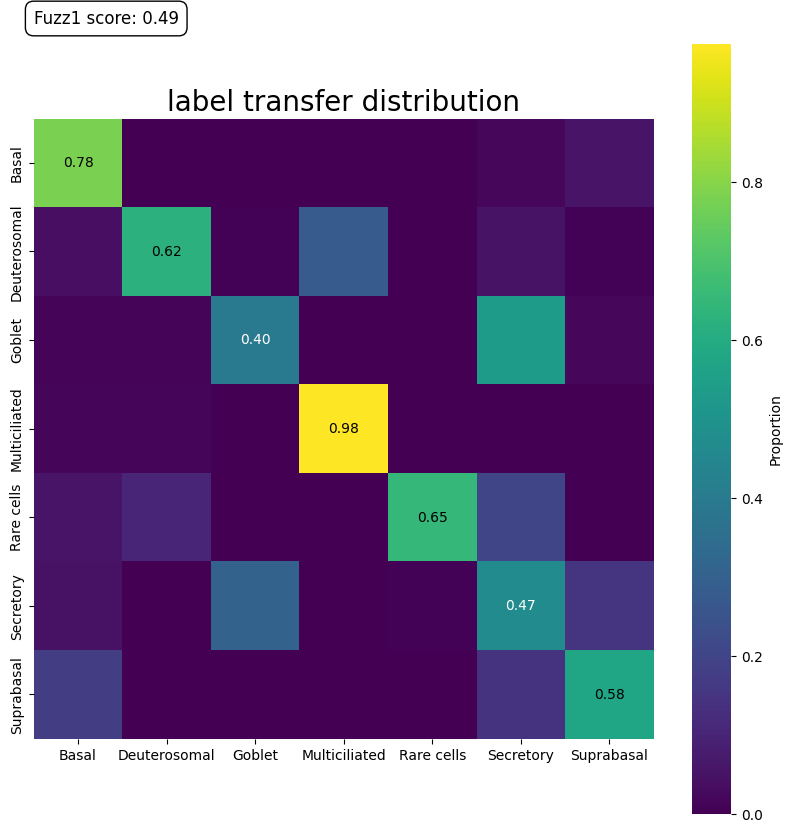

<Axes: title={'center': 'label transfer distribution'}>

In [27]:
fuzz_1 = viz.calculate_fuzz_1(query, reference_label='celltype_l1', predicted_query_label='mapped_predictions')
transfers = viz.map_label_transfers(query, 'mapped_predictions', 'celltype_l1')
viz.visualize_label_distribution(transfers, fuzz1_score=fuzz_1, title='label transfer distribution', proportions_flag = 'md', matched = True)

In [28]:
transfers

celltype_l1,Basal,Cycling Basal,Deuterosomal,Multiciliated,Suprabasal,Squamous,Secretory,Goblet,Rare cells
mapped_predictions,,,,,,,,,
Basal,0.781312,0.130219,0.000000,0.001325,0.050364,0.017561,0.017561,0.000994,0.000663
Deuterosomal,0.037838,0.000000,0.621622,0.275676,0.005405,0.005405,0.048649,0.005405,0.000000
Goblet,0.011324,0.000871,0.009582,0.000871,0.015679,0.026132,0.536585,0.398955,0.000000
Multiciliated,0.012428,0.000000,0.011472,0.976099,0.000000,0.000000,0.000000,0.000000,0.000000
Rare cells,0.050000,0.000000,0.100000,0.000000,0.000000,0.000000,0.200000,0.000000,0.650000
Secretory,0.044519,0.009574,0.003112,0.000479,0.150072,0.018430,0.465294,0.304691,0.003830
Suprabasal,0.174881,0.087440,0.000000,0.000000,0.577107,0.015898,0.144674,0.000000,0.000000
